In [1]:
#Estimating a star’s mass and radius using asteroseismology

In [2]:
import lightkurve as lk
import numpy as np
%matplotlib inline

In [3]:
#Plotting the Frequency Spectrum of a Solar like oscillator
search_result = lk.search_lightcurve('KIC 10963065',
                                     cadence='short',
                                     author='Kepler',
                                     quarter=(2,5,6,7))
lc = search_result.download_all().stitch()

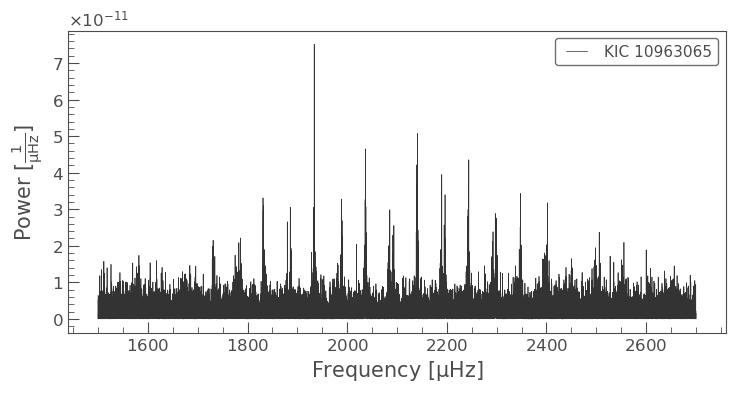

In [4]:
pg = lc.to_periodogram(normalization='psd',
                       minimum_frequency=1500,
                       maximum_frequency=2700)
ax = pg.plot();

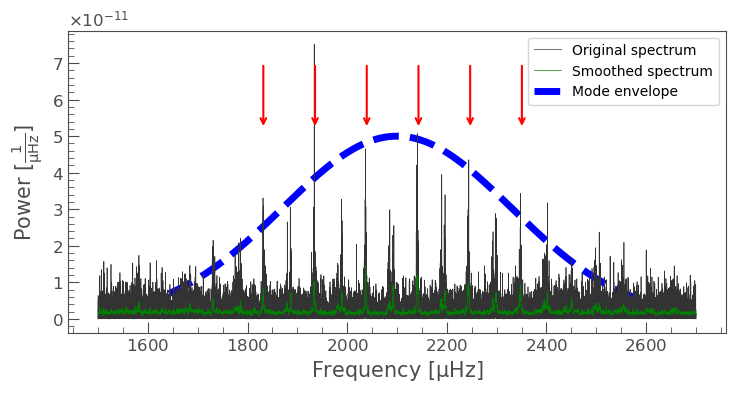

In [5]:
ax = pg.plot(label='Original spectrum')
pg.smooth(filter_width=1).plot(ax=ax,
                               color='green',
                               label='Smoothed spectrum')

# Highlighting the "mode envelope" using a Gaussian curve
f = pg.frequency.value
ax.plot(f, 5e-11*np.exp(-(f-2100)**2/(2*230**2)),
        lw=5, ls='--', zorder=0,
        color='blue', label='Mode envelope');

# Annotating the modes using red arrows
for i in range(6):
  ax.annotate('',
              xy=(1831.66+i*103.8, 5.2e-11),
              xytext=(1831.66+i*103.8, 7e-11),
              arrowprops=dict(arrowstyle='->',
              color='red',
              linewidth=1.5))
ax.legend();

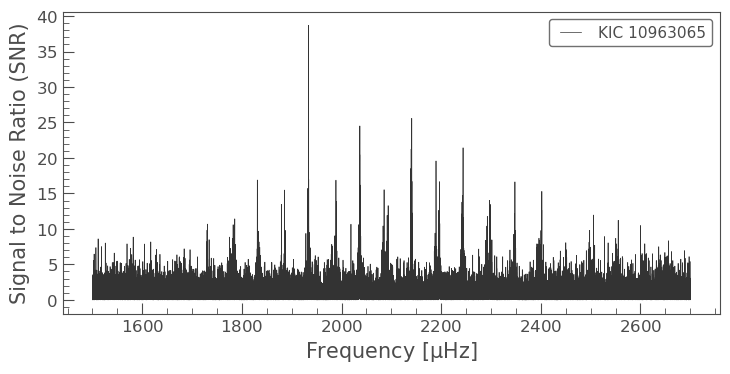

In [6]:
#Estimating the Frequency of Maximum Amplitude 
snr = pg.flatten()
ax = snr.plot();

In [7]:
seismology = snr.to_seismology() #converting periodogram to seismology object

In [8]:
seismology.estimate_numax()

numax: 2145.00 uHz (method: ACF2D)

In [9]:
seismology.numax.value

2145.0

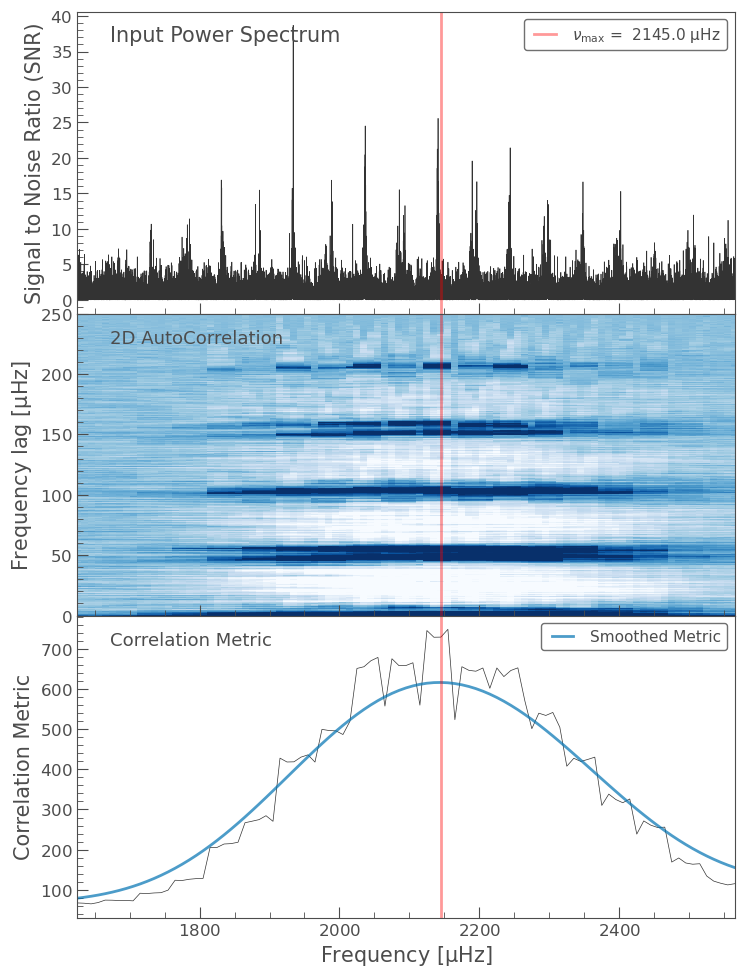

In [10]:
seismology.diagnose_numax(); # top panel=periodogram
                             # mid panel=Autocorelation Function (ACF)
                             #bottom panel=ACF summed along y-axis#

In [11]:
#Estimating the Frequency Spacing 
seismology.estimate_deltanu()

deltanu: 103.11 uHz (method: ACF2D)

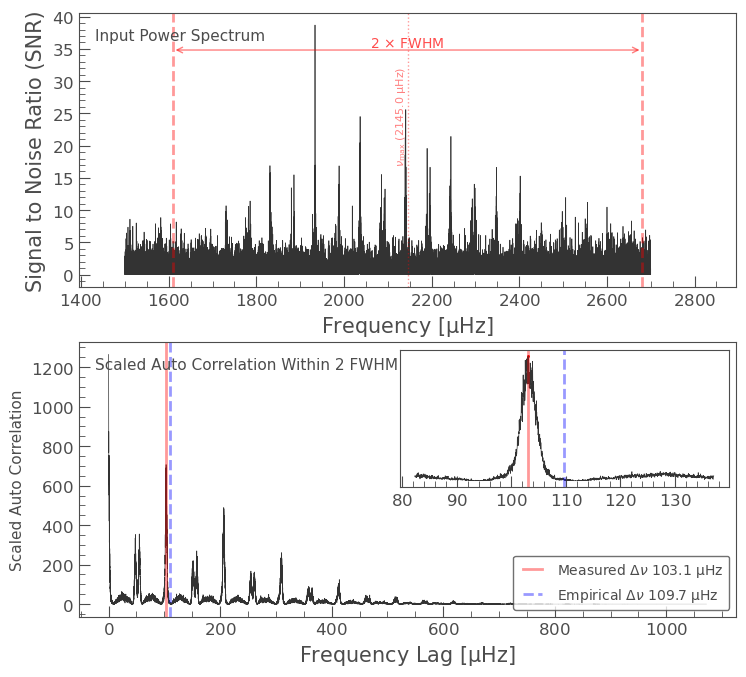

In [12]:
seismology.diagnose_deltanu();

In [13]:
seismology.estimate_mass()

mass: 1.08 solMass (method: Uncorrected Scaling Relations)

In [14]:
seismology.estimate_radius()

radius: 1.23 solRad (method: Uncorrected Scaling Relations)

In [15]:
seismology.estimate_logg()

logg: 4.29 dex (method: Uncorrected Scaling Relations)

In [16]:
seismology #shows the computed values of our seismology object

Seismology(ID: KIC 10963065) - computed values:
 * numax: 2145.00 uHz (method: ACF2D)
 * deltanu: 103.11 uHz (method: ACF2D)
 * mass: 1.08 solMass (method: Uncorrected Scaling Relations)
 * radius: 1.23 solRad (method: Uncorrected Scaling Relations)
 * logg: 4.29 dex (method: Uncorrected Scaling Relations)